# Tensorflow CNN implementation based on the example code of the documentation
### addapted for online training with custom data using google colab and your google drive

Use Tensorflow 2.4.1  (pip3 install tensorflow==2.4.1)

### How to use:
- create a directery in your Google Drive for your Images for training. (e.g.: "/content/drive/My Drive/MY_FOLDER/Colab_Notebooks/" )
- create sub-directories for your different classes
- dataset should be 416x416px (can be adjusted with img_width/img_height)
- use the "model_name" to set a name (this will create a folder with the saved modell after training)
- use the "image_path" to set the path to your custom data set
- make sure to set the runtime type to "GPU" for faster training
- When all directories are set press "Run all cells" to train your model
- the second cell will ask you to authenticate your Google Drive Account. Simply follow the given link and accept the requirements. Copy and paste the authentication-code into the second cell. 
- the model will now train with your data set and a GPU over the google colab servers
- the model will be saved to your Google Drive. This then can be used with the "Webcam_Image_Classifier.ipynb" Notebook

Usefull links: <br>
Model based on: https://www.tensorflow.org/tutorials/images/classification

In [226]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pathlib



In [227]:
#Mount your drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [228]:
path_string = "/content/drive/My Drive/FHTW/"
model_name = "miniUsecase16_Classifier_Hammer/model_1"
image_path = pathlib.Path(path_string + "miniUsecase16_Classifier_Hammer/")
image_count = len(list(image_path.glob('*/*.jpg')))
print(image_count)
data_dir = image_path


238


In [229]:
batch_size = 32
img_height = 416
img_width = 416

In [230]:
import tensorflow as tf

In [231]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.1,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = train_ds.class_names
print(class_names)
num_classes = len(class_names)
print(num_classes)


Found 238 files belonging to 3 classes.
Using 215 files for training.
['Hammer', 'Schraubenzieher', 'Workspace']
3


In [232]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.1,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 238 files belonging to 3 classes.
Using 47 files for validation.


# Creating and Training the model

In [233]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [234]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height, img_width,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)


In [235]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


In [236]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [237]:
model.summary()


Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_28 (Sequential)   (None, 416, 416, 3)       0         
_________________________________________________________________
rescaling_14 (Rescaling)     (None, 416, 416, 3)       0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 416, 416, 16)      448       
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 208, 208, 16)      0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 208, 208, 32)      4640      
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 104, 104, 32)      0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 104, 104, 64)    

In [238]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/50
7/7 [==============================] - 3s 159ms/step - loss: 5.0797 - accuracy: 0.3250 - val_loss: 1.1309 - val_accuracy: 0.2340
Epoch 2/50
7/7 [==============================] - 1s 99ms/step - loss: 1.0829 - accuracy: 0.4149 - val_loss: 0.8917 - val_accuracy: 0.4681
Epoch 3/50
7/7 [==============================] - 1s 99ms/step - loss: 0.8951 - accuracy: 0.5286 - val_loss: 0.7512 - val_accuracy: 0.6596
Epoch 4/50
7/7 [==============================] - 1s 98ms/step - loss: 0.8037 - accuracy: 0.6376 - val_loss: 0.7332 - val_accuracy: 0.7872
Epoch 5/50
7/7 [==============================] - 1s 100ms/step - loss: 0.6550 - accuracy: 0.7866 - val_loss: 0.5072 - val_accuracy: 0.8298
Epoch 6/50
7/7 [==============================] - 1s 104ms/step - loss: 0.5511 - accuracy: 0.8254 - val_loss: 0.4831 - val_accuracy: 0.7660
Epoch 7/50
7/7 [==============================] - 1s 101ms/step - loss: 0.4829 - accuracy: 0.8113 - val_loss: 0.4514 - val_accuracy: 0.8298
Epoch 8/50
7/7 [=======

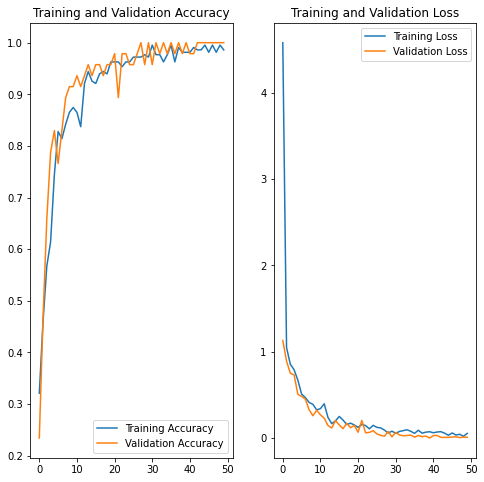

In [239]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Save Model

In [240]:
#Save Model
# path defined in first block
model.save(path_string + model_name)
print("Training Done!")

INFO:tensorflow:Assets written to: /content/drive/My Drive/FHTW/miniUsecase16_Classifier_Hammer/model_1/assets
Training Done!
